## 네이버 쇼핑 제품 순위 크롤링
----

### 1. 쇼핑 페이지 정보 탐색

----
#### 1) requests로 데이터 접근하기

In [1]:
import time

from selenium import webdriver
import requests
from bs4 import BeautifulSoup

query = "모니터"
url = f"https://search.shopping.naver.com/search/all?query={query}"
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, "html.parser")

In [2]:
item_list = soup.find_all("div")

In [3]:
item_list

[<div class="content_error">
 <div class="head">쇼핑 서비스 접속이 일시적으로 제한되었습니다. </div>
 <div class="desc">
     네이버는 안정적인 쇼핑 서비스 제공하고자 시스템을 통해 아래와 같은 비정상적인 접근이 감지될 경우 해당 네트워크의 접속을 일시적으로 제한하고 있습니다.
   </div>
 <ul class="reason">
 <li>상품 구매, 탐색과 무관한 외부 이벤트를 통한 접속</li>
 <li>짧은 시간 내에 너무 많은 요청이 이루어진 IP</li>
 <li>VPN을 사용하여 접속한 IP</li>
 <li>특정 확장 프로그램 이용 시</li>
 </ul>
 <div class="footer">위와 같은 접근이 아님에도 접속이 제한된 경우,네이버앱을 업데이트 또는 <a href="https://help.naver.com/service/30016/category/5278" target="_blank">원클릭 진단</a>을 부탁드립니다.<br/> 해당 방법을 통해서도 접속이 불가한 경우 <a href="https://help.pay.naver.com/mail/form.help?alias=shopping_stop" target="_blank">네이버쇼핑 고객센터</a>로 문의 부탁드립니다.</div>
 </div>,
 <div class="head">쇼핑 서비스 접속이 일시적으로 제한되었습니다. </div>,
 <div class="desc">
     네이버는 안정적인 쇼핑 서비스 제공하고자 시스템을 통해 아래와 같은 비정상적인 접근이 감지될 경우 해당 네트워크의 접속을 일시적으로 제한하고 있습니다.
   </div>,
 <div class="footer">위와 같은 접근이 아님에도 접속이 제한된 경우,네이버앱을 업데이트 또는 <a href="https://help.naver.com/service/30016/category/5278" target="_blank">원클릭 진단</a>을 부탁

#### 이런 종류의 페이지는 동적 크롤링 없이 수행하기 힘듬

![개발자도구](../etc/shopping_1.png)

----
#### 2) selenium으로 데이터 접근하기
- product_item__{xxx} : 이 패턴이 항상 바뀔 확률이 높음

In [4]:
keyword_list = ['모니터']
driver = webdriver.Chrome()

for keyword in keyword_list:
    url = f"https://search.shopping.naver.com/search/all?query={keyword}"
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    div = soup.find_all("div", attrs={"class":"product_item__MDtDF"})
    print(div)

driver.quit()

[<div class="product_item__MDtDF"><div class="product_inner__gr8QR"><div class="product_img_area__cUrko"><div class="thumbnail_thumb_wrap__RbcYO _wrapper"><a class="thumbnail_thumb__Bxb6Z linkAnchor" data-i="23692201495" data-ms="0" data-nclick="N=a:lst*C.image,r:1,i:23692201495" href="https://cr.shopping.naver.com/adcr.nhn?x=i8Rw1aEEAhgQju%2BLSTmxTv%2F%2F%2Fw%3D%3DsWfsWY66BNvWl%2BuLXf9KU2dFroiCu7v59%2Bsmr%2F5HT6n9Q3qrx3p0MRIb3ekawSdvJ8XOeEF%2Bo6BlxPfQGFIycdybCjYbEOx0tVIEM5zP%2FMB0dg8bFUKVSZe5%2BRYuU%2FszZ6qGJAfg9iNEWjki41LFTLt9%2BKy%2Fm0d%2BgYWHtEf61Jo5CNclKwvLyA%2Fys%2F%2FHPPajLvWRU0%2FSf5flL335cSfN%2B9SKH4uGhdMZI%2BTAm7Oh3XZYWq6062OEPPa9WB%2BtWbtCGjU%2Fr5rKMv8EIxFGEqAWH%2BAKw5Ui35JxY1y%2FtaAWquiq54J8UO7LDGXdPU9Do8oyMXmq0wb8nQ9S1CNyVqQgAyENMctI8a4Vbh7TJZQfcDGezaLo3YojXuQJMvdaZ%2BI%2FyuZhUrcIzHYjxpAfag5sEwv338pbat1ivwYHGl1U6FguxyTNOpvF5JKAAUscSxRXp3XHsX01Yi%2BPBNlcfBExuW%2FI0fIFRfBZUPaSLRPGc3PJhLPeyb5UrW4qIz6ae558JaBAPkLYAnSpLCLoiQX7rwhGk4XMJtozo5T3u6g%2BJ%2BOtrocFA3ZsuROIr3yTmZCohYOT

----
#### 3) 광고 상품 데이터 수집

In [5]:
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()

for keyword in keyword_list:
    # 드라이버로 페이지 소스 가져옴
    url = f"https://search.shopping.naver.com/search/all?query={keyword}"
    driver.get(url)
    time.sleep(2)
    html = driver.page_source
    driver.quit()
    
    # 가져온 소스 파싱
    soup = BeautifulSoup(html, "html.parser")
    basis = soup.select_one("[class^='basicList_list_basis']")
    items = basis.select("[class^='adProduct_item']")
    for item in items:
        info_area = item.select_one("[class^='adProduct_info_area']")
        print(info_area.text)
        print("--------------------")

180Hz 고주사율카멜 CM2710GI 27인치 IPS패널 게이밍모니터 리얼 180광고199,000원배송비무료오늘출발디지털/가전모니터품목 : 게이밍모니터화면크기 : 27인치(68~69cm)최대 해상도 : 1920x1080(FHD)최대 주사율 : 180Hz패널 : IPS패널화면비율 : 16:9화면종류 : LED곡면형 : 평면응답속도 : 1ms응답속도기준 : MPRT밝기 : 300CD명암비 : 1000:1픽셀피치 : 0.3114×0.3114mm게임특화 : 조준선표시, FreeSync색표현 : sRGB(99%)시력보호 : 로우블루라이트, 플리커프리, 안티글레어조명 : LED백라이트단자 : DisplayPort, 오디오출력, HDMI2.0소비전력 : 48W대기전력 : 0.5W스탠드 기능 : 틸트(상하)무게(스탠드포함) : 4.9kgVESA홀 : 75x75슬림베젤 : 0.6cm출시년도 : 2024년포토리뷰 작성 후 이벤트 참여 시 베스킨 파인트 지급!리뷰4.9677찜120등록일 2024.05.신고하기톡톡
--------------------
삼성전자 뷰피니티 S7 S27D700광고최저350,000원배송비무료판매처 5디지털/가전모니터품목 : 모니터화면크기 : 27인치(68~69cm)최대 해상도 : 3840x2160(4K UHD)패널 : IPS패널화면비율 : 16:9화면종류 : LED곡면형 : 평면응답속도 : 5ms밝기 : 350CD명암비 : 1000:1HDR : HDR 10색표현 : sRGB(99%)시력보호 : 플리커프리부가기능 : HDCP지원조명 : LED백라이트영상물저작권보호 : HDCP2.2화면분할 : PIP, PBP터치화면유무 : 터치안됨단자 : HDMI, DisplayPort소비전력 : 37W대기전력 : 0.5W스탠드 기능 : 피벗(회전), 틸트(상하)무게(스탠드포함) : 5kgVESA홀 : 100x100색상 : 블랙출시년도 : 2024년찜2등록일 2024.06.정보 수정요청
--------------------
QHD 165Hz의 게이밍모니터 완판 후 재입고카

----
#### 4) 일반 상품 데이터 수집
- 스크롤을 내려야 더 수집할 수 있는 구조

In [6]:
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()

for keyword in keyword_list:
    # 드라이버로 페이지 소스 가져옴
    url = f"https://search.shopping.naver.com/search/all?query={keyword}"
    driver.get(url)
    time.sleep(2)
    html = driver.page_source
    driver.quit()
    
    # 가져온 소스 파싱
    soup = BeautifulSoup(html, "html.parser")
    basis = soup.select_one("[class^='basicList_list_basis']")
    items = basis.select("[class^='product_item']")
    for item in items:
        info_area = item.select_one("[class^='product_info_area']")
        print(info_area.text)
        print("--------------------")

LG전자 27MN430HW최저170,000원배송비무료판매처 170디지털/가전모니터품목 : 게이밍모니터화면크기 : 27인치(68~69cm)최대 해상도 : 1920x1080(FHD)최대 주사율 : 75Hz패널 : IPS패널화면비율 : 16:9화면종류 : LED응답속도 : 5ms밝기 : 250CD명암비 : 1000:1픽셀피치 : 0.3114mm게임특화 : 게임모드, 블랙스태빌라이저, 조준선표시, FreeSync, 액션모드(DAS)색표현 : NTSC(72%)시력보호 : 플리커프리, 리더모드, 색약지원모드화면모드 : 절전모드단자 : D-SUB, HDMI, 오디오출력소비전력 : 28W대기전력 : 0.3W스탠드 기능 : 틸트(상하)VESA홀 : 75x75별점4.87리뷰(6,125)찜642등록일 2020.06.정보 수정요청
--------------------


In [104]:
len(items)

1

### 2. 텍스트 마이닝

----
#### 1) 드라이버 스크롤

In [105]:
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()

for keyword in keyword_list:
    # 드라이버로 페이지 소스 가져옴
    url = f"https://search.shopping.naver.com/search/all?query={keyword}"
    driver.get(url)
    time.sleep(2)
    driver.execute_script("window.scrollTo(0,1000)")
    html = driver.page_source
    driver.quit()
    
    # 가져온 소스 파싱
    soup = BeautifulSoup(html, "html.parser")
    basis = soup.select_one("[class^='basicList_list_basis']")
    items = basis.select("[class^='product_item']")
    for item in items:
        info_area = item.select_one("[class^='product_info_area']")
        print(info_area.text)
        print("--------------------")

LG전자 울트라HD 32UP830최저471,750원배송비무료판매처 126디지털/가전모니터품목 : 게이밍모니터화면크기 : 32인치(80~81cm)최대 해상도 : 3840x2160(4K UHD)패널 : IPS패널화면비율 : 16:9곡면형 : 평면응답속도 : 5ms응답속도기준 : GTG밝기 : 360CD명암비 : 1000:1픽셀피치 : 0.18159mm게임특화 : 게임모드, 블랙스태빌라이저, 인풋렉감소, 조준선표시, FreeSync, 액션모드(DAS)HDR : HDR 10색표현 : DCI-P3(90%)시력보호 : 플리커프리, 리더모드, 색약지원모드부가기능 : 스피커 내장OSD조작 : 소프트웨어단자 : HDMI, DisplayPort, USB, USB Type-C스피커 : 5Wx2개소비전력 : 55W대기전력 : 0.5W스탠드 기능 : 피벗(회전), 틸트(상하), 엘리베이션(높낮이)무게(스탠드포함) : 8.3kgVESA홀 : 100x100출시년도 : 2023년별점4.92리뷰(1,553)찜351등록일 2023.07.정보 수정요청
--------------------
LG전자 32QN650최저336,290원배송비무료판매처 268디지털/가전모니터품목 : 모니터화면크기 : 32인치(80~81cm)최대 해상도 : 2560x1440(QHD)최대 주사율 : 75Hz패널 : IPS패널화면비율 : 16:9화면종류 : LED곡면형 : 평면응답속도 : 5ms밝기 : 350CD명암비 : 1000 : 1픽셀피치 : 0.2727mm게임특화 : 게임모드, 블랙스태빌라이저, FreeSync, 액션모드(DAS)HDR : HDR 10색표현 : sRGB(99%), 10비트컬러(8비트 + FRC)시력보호 : 플리커프리, 리더모드색보정 : 색보정지원OSD조작 : 소프트웨어화면모드 : 절전모드, 영화감상모드단자 : DisplayPort, 오디오출력, HDMI(2개)소비전력 : 40W대기전력 : 0.5W스탠드 기능 : 틸트(상하), 엘리베이션(높낮이)무게(스탠드포함) : 8.2kgVESA홀 : 100x100색

----
#### 2) 데이터 수집 및 정제
- 필요한 데이터 정의 : 상품명, 가격, 세부태그
- 정규표현식 필터링
- 형태소 추출

In [137]:
from selenium.webdriver.common.by import By

keyword = '운동화'
driver = webdriver.Chrome()

url = f"https://search.shopping.naver.com/search/all?query={keyword}"
driver.get(url)
time.sleep(2)
driver.execute_script("window.scrollTo(0,5000)")  # javascript 문법, 개발자도구의 console 창에서 실행 가능
html = driver.page_source
driver.quit()

# 가져온 소스 파싱
soup = BeautifulSoup(html, "html.parser")
basis = soup.select_one("[class^='basicList_list_basis']")
items = basis.select("[class^='product_item']")

row_list = []
for item in items:
    info_area = item.select_one("[class^='product_info_area']")
    title = info_area.select_one("[class^='product_title']").text
    price = info_area.select_one("[class^='price_num']").text
    desc = info_area.select_one("[class^='product_desc']").text
    row = {'title': title, 'price': price, 'desc': desc}
    row_list.append(row)

In [139]:
import pandas as pd

df = pd.DataFrame(row_list)
df.head()

,title,price,desc
0,뉴발란스 530 MR530SG,"130,830원",발목높이 : 로우탑사용대상 : 남성용조임방식 : 끈
1,나이키 써밋화이트 TC7900 DD9682 100,"77,600원","주요소재(신발) : 인조가죽(합성피혁), 메시발목높이 : 로우탑조임방식 : 끈사용대..."
2,나이키 데이브레이크 CK2351 101,"67,184원","주요소재(신발) : 인조가죽(합성피혁), 스웨이드, 폴리에스테르, 고무부가기능 : ..."
3,(국내매장판) 나이키 V2K 런 테크 서밋화이트 메탈릭실버,"149,000원","주요소재(신발) : 인조가죽(합성피혁), 메시부가기능 : 키높이, 충격흡수, 경량굽..."
4,아디다스 갤럭시 6 GW3848,"43,990원","주요소재(신발) : 폴리에스테르, 고무발목높이 : 로우탑사용대상 : 남성용조임방식 : 끈"


In [140]:
# 가격 숫자로 변환
df['price'] = df['price'].apply(lambda x: int(x.replace(',', '')[:-1]))

In [141]:
df.head()

,title,price,desc
0,뉴발란스 530 MR530SG,130830,발목높이 : 로우탑사용대상 : 남성용조임방식 : 끈
1,나이키 써밋화이트 TC7900 DD9682 100,77600,"주요소재(신발) : 인조가죽(합성피혁), 메시발목높이 : 로우탑조임방식 : 끈사용대..."
2,나이키 데이브레이크 CK2351 101,67184,"주요소재(신발) : 인조가죽(합성피혁), 스웨이드, 폴리에스테르, 고무부가기능 : ..."
3,(국내매장판) 나이키 V2K 런 테크 서밋화이트 메탈릭실버,149000,"주요소재(신발) : 인조가죽(합성피혁), 메시부가기능 : 키높이, 충격흡수, 경량굽..."
4,아디다스 갤럭시 6 GW3848,43990,"주요소재(신발) : 폴리에스테르, 고무발목높이 : 로우탑사용대상 : 남성용조임방식 : 끈"


In [142]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식
    result = hangul.sub('', text)
    return result

In [143]:
# 정제 함수 적용
df['desc'] = df['desc'].apply(lambda x: text_cleaning(x))

In [144]:
df.head()

,title,price,desc
0,뉴발란스 530 MR530SG,130830,발목높이 로우탑사용대상 남성용조임방식 끈
1,나이키 써밋화이트 TC7900 DD9682 100,77600,주요소재신발 인조가죽합성피혁 메시발목높이 로우탑조임방식 끈사용대상 여성용
2,나이키 데이브레이크 CK2351 101,67184,주요소재신발 인조가죽합성피혁 스웨이드 폴리에스테르 고무부가기능 경량발목높이 로...
3,(국내매장판) 나이키 V2K 런 테크 서밋화이트 메탈릭실버,149000,주요소재신발 인조가죽합성피혁 메시부가기능 키높이 충격흡수 경량굽높이 대 대발목...
4,아디다스 갤럭시 6 GW3848,43990,주요소재신발 폴리에스테르 고무발목높이 로우탑사용대상 남성용조임방식 끈


In [145]:
# 말뭉치 생성
desc_corpus = "".join(df['desc'].tolist())
print(desc_corpus)

발목높이  로우탑사용대상  남성용조임방식  끈주요소재신발  인조가죽합성피혁 메시발목높이  로우탑조임방식  끈사용대상  여성용주요소재신발  인조가죽합성피혁 스웨이드 폴리에스테르 고무부가기능  경량발목높이  로우탑조임방식  끈사용대상  여성용주요소재신발  인조가죽합성피혁 메시부가기능  키높이 충격흡수 경량굽높이  대 대발목높이  로우탑솔  고무주요소재신발  폴리에스테르 고무발목높이  로우탑사용대상  남성용조임방식  끈성별  공용연령  세 세 세 세이상주요소재  메시주요특징  통풍 충격흡수 경량발목높이  로우탑솔  고무타켓연령  키즈주요소재신발  인조가죽합성피혁 폴리에스테르부가기능  충격흡수 경량굽높이  대발목높이  로우탑솔  고무주요소재신발  인조가죽합성피혁 메시부가기능  키높이 충격흡수 에어굽높이  대 대발목높이  로우탑솔  고무사용대상  남성용주요소재신발  폴리에스테르 폴리우레탄 기타부가기능  통풍 충격흡수 경량굽높이  이하발목높이  로우탑솔  고무사용대상  남녀공용조임방식  끈계절  사계절연령  세 세 세 세 세 세이상주요소재  가죽 인조가죽합성피혁 메시주요특징  통풍 충격흡수타켓연령  키즈주요소재신발  폴리에스테르 폴리우레탄 기타부가기능  키높이 충격흡수 경량굽높이  대 대 이하발목높이  미드탑솔  고무사용대상  남녀공용계절  사계절신세계 유니버스 클럽 최대 만원 할인 혜택  네이버 쇼핑 최대  할인쿠폰주요소재신발  메시 고무부가기능  통풍 경량발목높이  로우탑조임방식  끈사용대상  여성용주요소재신발  가죽 폴리에스테르발목높이  로우탑조임방식  끈사용대상  여성용주요소재신발  인조가죽합성피혁 메시 폴리에스테르 고무부가기능  통풍 에어굽높이  대발목높이  로우탑조임방식  끈사용대상  여성용주요소재신발  인조가죽합성피혁 폴리에스테르발목높이  로우탑사용대상  남성용조임방식  끈주요소재신발  인조가죽합성피혁 메시부가기능  통풍 경량굽높이  대발목높이  로우탑솔  고무사용대상  남녀공용조임방식  끈계절  사계절주요소재신발  폴리에스테르 고무 폴리우레탄부가기능  통풍

In [118]:
!pip install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)


In [146]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(desc_corpus)
count = Counter(nouns)

In [162]:
count

Counter({'높이': 42,
         '발목': 26,
         '로우': 25,
         '소재': 25,
         '사용': 22,
         '대상': 22,
         '신발': 22,
         '방식': 20,
         '끈': 18,
         '폴리에스테르': 18,
         '고무': 18,
         '부가': 17,
         '기능': 17,
         '탑': 16,
         '가죽': 16,
         '세': 14,
         '굽': 13,
         '통풍': 13,
         '인조': 12,
         '합성': 12,
         '피혁': 12,
         '메시': 12,
         '경량': 11,
         '충격': 11,
         '흡수': 11,
         '탑솔': 10,
         '성용': 9,
         '남성': 8,
         '용': 8,
         '공용': 7,
         '연령': 6,
         '폴리우레탄': 6,
         '계절': 6,
         '사계절': 6,
         '남녀': 5,
         '키': 3,
         '이상': 3,
         '키즈': 3,
         '에어': 3,
         '기타': 3,
         '성별': 2,
         '특징': 2,
         '이하': 2,
         '최대': 2,
         '할인': 2,
         '끈솔': 2,
         '스웨이드': 1,
         '미드': 1,
         '신세계': 1,
         '유니버스': 1,
         '클럽': 1,
         '만원': 1,
         '혜택': 1,
         '네이버

----
#### 3) 데이터 분석
- 가격 분석
- 워드 클라우드

<Axes: >

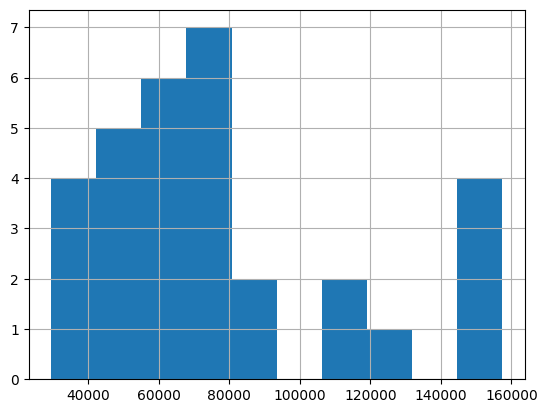

In [148]:
df['price'].hist()

<Axes: >

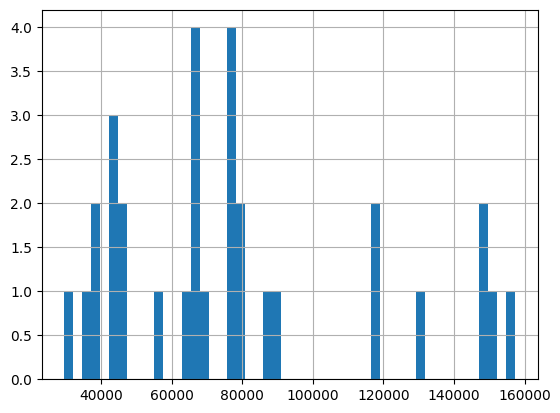

In [154]:
df['price'].hist(bins=50)

#### WordCloud 시각화를 위한 설치 리스트
- pip install wordcloud
- https://hangeul.naver.com/font 에서 'NanumGothic.ttf' 다운로드
- 'NanumGothic.ttf' 파일 특정 경로로 이동

In [156]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 5.3 MB/s eta 0:00:00


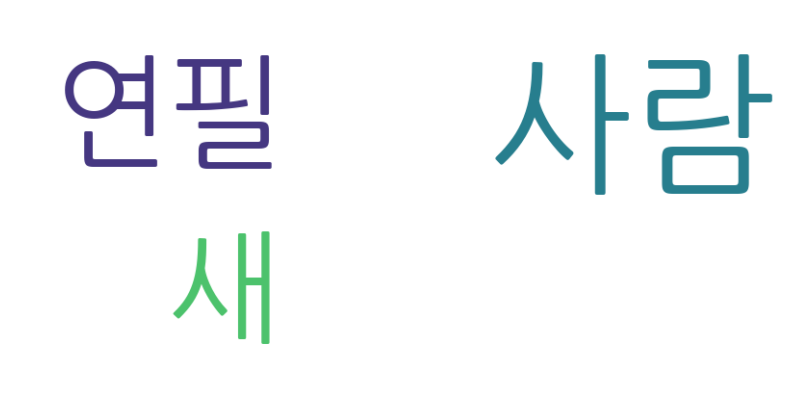

In [161]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Your Counter object with Korean words
word_counts = Counter({'사람': 42, '연필': 26, '새': 25})

# Path to a Korean font
font_path = './etc/NanumGothic.ttf'  # Update this to the correct path of your Korean font file

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path
).generate_from_frequencies(word_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

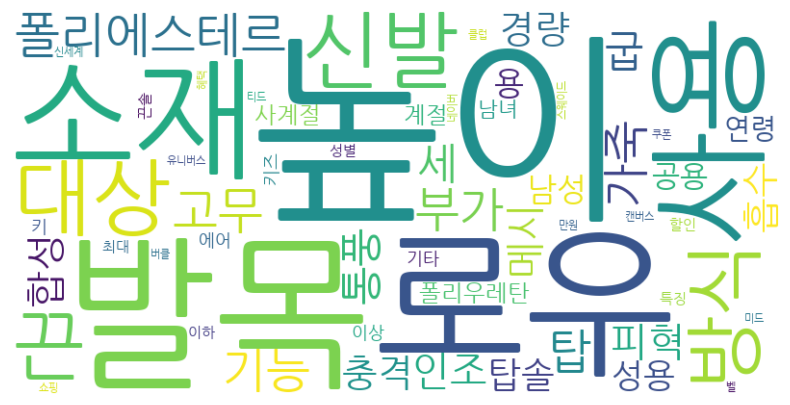

In [163]:
# Path to a Korean font
font_path = './etc/NanumGothic.ttf'  # Update this to the correct path of your Korean font file

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path
).generate_from_frequencies(count)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()